In [168]:
# Algorithmic Trading Strategy Using Python
# Using Yahoo Finance intermedia call/API

In [169]:
from math import *
import pandas as pd
import numpy as np
from requests import get
from datetime import datetime
import matplotlib.pyplot as plt
# plt.style.available
plt.style.use('fivethirtyeight')

In [221]:
dayRange = "8d"
Interval = "1h"
params01 = f"symbol=EURUSD%3DX&range={dayRange}&period1=&period2=&interval={Interval}"
params02 = f"&includePrePost=true&events=&lang=en-US&region=US&crumb=&corsDomain=finance.yahoo.com"
data_url = f"https://query1.finance.yahoo.com/v8/finance/chart/EURUSD=X?{params01}{params02}"

r = get(data_url)
jdata = r.json()

# print (jdata)

In [222]:
metas = jdata['chart']['result'][0]['meta']
timestamp = jdata['chart']['result'][0]['timestamp']
stock_high = jdata['chart']['result'][0]['indicators']['quote'][0]['high']
stock_low = jdata['chart']['result'][0]['indicators']['quote'][0]['low']
stock_open = jdata['chart']['result'][0]['indicators']['quote'][0]['open']
stock_close = jdata['chart']['result'][0]['indicators']['quote'][0]['close']
stock_volume = jdata['chart']['result'][0]['indicators']['quote'][0]['volume']

# fix error: if Interval < 1d
try:
    adjclose = jdata['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']
except:
    adjclose = stock_close

dcolumns = {
    'timestamp': timestamp,
    'high': stock_high,
    'low': stock_low,
    'open': stock_open,
    'close': stock_close,
    'volume': stock_volume,
    'adjclose': adjclose
}
dframe = pd.DataFrame(dcolumns)

print (dframe.head())

    timestamp      high       low      open     close  volume  adjclose
0  1597791600  1.195600  1.194030  1.194315  1.195029       0  1.195029
1  1597795200  1.195743  1.194315  1.195029  1.195171       0  1.195171
2  1597798800  1.195600  1.194172  1.195171  1.194315       0  1.194315
3  1597802400  1.194458  1.193602  1.194315  1.194030       0  1.194030
4  1597806000  1.194600  1.193175  1.194030  1.193317       0  1.193317


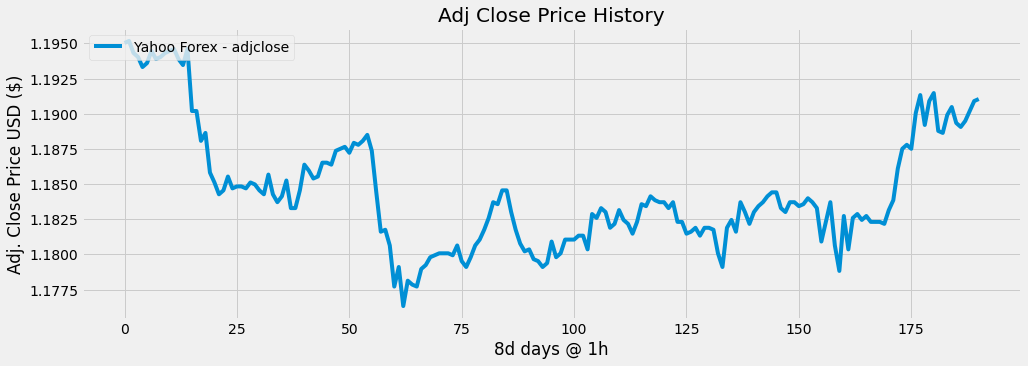

In [223]:
# visualize the data
plt.figure(figsize=(15, 5))
plt.plot(dframe['adjclose'], label='Yahoo Forex - adjclose')
plt.title('Adj Close Price History')
plt.xlabel(f'{dayRange} days @ {Interval}')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [224]:
# create simple-moving-average with a 3-days window
sma3 = pd.DataFrame()
sma3['adjclose'] = dframe['adjclose'].rolling(window=3).mean()

# create simple-moving-average with a 4-days window
sma14 = pd.DataFrame()
sma14['adjclose'] = dframe['adjclose'].rolling(window=14).mean()

# create simple-moving-average with a 10-days window
sma10 = pd.DataFrame()
sma10['adjclose'] = dframe['adjclose'].rolling(window=10).mean()

# create simple-moving-average with a 30-days window
sma30 = pd.DataFrame()
sma30['adjclose'] = dframe['adjclose'].rolling(window=30).mean()

# create simple-moving-average with a 60-days window
sma60 = pd.DataFrame()
sma60['adjclose'] = dframe['adjclose'].rolling(window=60).mean()

# create simple-moving-average with a 90-days window
sma90 = pd.DataFrame()
sma90['adjclose'] = dframe['adjclose'].rolling(window=90).mean()

# create simple-moving-average with a 90-days window
sma100 = pd.DataFrame()
sma100['adjclose'] = dframe['adjclose'].rolling(window=100).mean()

# create simple-moving-average with a 150-days window
sma150 = pd.DataFrame()
sma150['adjclose'] = dframe['adjclose'].rolling(window=150).mean()

# create median with a 3-days window
median3 = pd.DataFrame()
median3['adjclose'] = dframe['adjclose'].rolling(window=3).median()

# create median with a 30-days window
median30 = pd.DataFrame()
median30['adjclose'] = dframe['adjclose'].rolling(window=30).median()

# create median with a 30-days window
median60 = pd.DataFrame()
median60['adjclose'] = dframe['adjclose'].rolling(window=60).median()

# create median with a 90-days window
median90 = pd.DataFrame()
median90['adjclose'] = dframe['adjclose'].rolling(window=90).median()

# create median with a 150-days window
median150 = pd.DataFrame()
median150['adjclose'] = dframe['adjclose'].rolling(window=150).median()

# 3 days mean - median
mmdiff3 = pd.DataFrame()
mmdiff3['adjclose'] =  sma3['adjclose'] + median3['adjclose']

# 30 days mean - median
mmdiff30 = pd.DataFrame()
mmdiff30['adjclose'] =  sma30['adjclose'] + median90['adjclose']

# 60 days mean - median
mmdiff60 = pd.DataFrame()
mmdiff60['adjclose'] =  sma60['adjclose'] + median60['adjclose']

# 90 days mean - median
mmdiff90 = pd.DataFrame()
mmdiff90['adjclose'] =  sma90['adjclose'] + median90['adjclose']

# 150 days mean - median
mmdiff150 = pd.DataFrame()
mmdiff150['adjclose'] =  sma150['adjclose'] + median150['adjclose']

# std
daviation = pd.DataFrame()
daviation['stddiv'] = dframe['high'].rolling(window=5).std() + median3['adjclose']

# bollinger
bollinger = pd.DataFrame()
bollinger['upper'] = sma10['adjclose'] + 2.5 * dframe['adjclose'].rolling(window=10).std()
bollinger['lower'] = sma10['adjclose'] - 2.5 * dframe['adjclose'].rolling(window=10).std()

# final data array
fdata = pd.DataFrame()
fdata['high'] = dframe['high']
fdata['low'] = dframe['low']
fdata['open'] = dframe['open']
fdata['close'] = dframe['close']
fdata['volume'] = dframe['volume']
fdata['high'] = dframe['high']
fdata['actual_close'] = dframe['adjclose']
fdata['sma3'] = sma3['adjclose']
fdata['sma10'] = sma10['adjclose']
fdata['sma14'] = sma14['adjclose']
fdata['sma30'] = sma30['adjclose']
fdata['sma60'] = sma60['adjclose']
fdata['sma90'] = sma90['adjclose']
fdata['sma100'] = sma100['adjclose']
fdata['sma150'] = sma150['adjclose']
fdata['median3'] = median3['adjclose']
fdata['median30'] = median30['adjclose']
fdata['median60'] = median60['adjclose']
fdata['median90'] = median90['adjclose']
fdata['median150'] = median150['adjclose']
fdata['mmdiff3'] = mmdiff3['adjclose']
fdata['mmdiff30'] = mmdiff30['adjclose']
fdata['mmdiff60'] = mmdiff60['adjclose']
fdata['mmdiff90'] = mmdiff90['adjclose']
fdata['mmdiff150'] = mmdiff150['adjclose']
fdata['stddiv'] = daviation['stddiv']
fdata['bollinger_upper'] = bollinger['upper']
fdata['bollinger_lower'] = bollinger['lower']

print (fdata.tail())


         high       low      open     close  volume  actual_close      sma3  \
187  1.190051  1.188919  1.188919  1.189485       0      1.189485  1.189296   
188  1.190334  1.188778  1.189343  1.190193       0      1.190193  1.189579   
189  1.191043  1.190193  1.190193  1.190902       0      1.190902  1.190193   
190  1.191043  1.191043  1.191043  1.191043       0      1.191043  1.190713   
191       NaN       NaN       NaN       NaN       0           NaN       NaN   

        sma10     sma14     sma30  ...  median90  median150   mmdiff3  \
187  1.189726  1.189567  1.185895  ...  1.183012   1.182662  2.378640   
188  1.189825  1.189739  1.186214  ...  1.183012   1.182662  2.379064   
189  1.189825  1.189981  1.186616  ...  1.183082   1.182662  2.380386   
190  1.189783  1.190052  1.186893  ...  1.183152   1.182662  2.381614   
191       NaN       NaN       NaN  ...       NaN        NaN       NaN   

     mmdiff30  mmdiff60  mmdiff90  mmdiff150    stddiv  bollinger_upper  \
187  2.3689

In [432]:
def buy_sell_strategy_001(data):
    buySignals = []
    selSignals = []
    flag = -1
    for i in range(len(data)):
        _newBugSig = np.nan
        _newSelSig = np.nan
        if (data['high'][i] > data['stddiv'][i]):
            if flag != 1:
                _perc = (data['high'][i] / data['stddiv'][i]) * 100
                case_1 = float(_perc) > 100.12
                if case_1 == True:
                    _newBugSig = data['high'][i]
                    flag = 1
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
        elif (data['high'][i] < data['stddiv'][i]):
            _newBugSig = np.nan
            if flag != 0:
                _newSelSig = data['high'][i]
                flag = 0
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
        else:
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
            
    return (buySignals, selSignals)

def buy_sell_strategy_002(data):
    buySignals = []
    selSignals = []
    flag = -1
    for i in range(len(data)):
        _newBugSig = np.nan
        _newSelSig = np.nan
        case_1 = data['high'][i] > data['stddiv'][i]
        case_2 = data['stddiv'][i] > data['sma10'][i]
        case_3 = data['sma10'][i] > data['sma3'][i]
        case_4 = data['stddiv'][i] > data['sma10'][i]
        case_5 = data['high'][i] < data['sma10'][i]
        # print (f"case_1, case_2, case_3 : {case_1} {case_2} {case_3}")
        if case_1 == True and case_2 == True and case_3 == True:
            if flag != 1:
                _newBugSig = data['high'][i]
                flag = 1
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
        elif case_4 == True and case_5 == True:
            _newSelSig = data['high'][i]
            flag = 0
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
        else:
            flag = 0
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
            
    return (buySignals, selSignals)

def buy_strategy_001(data):
    buySignals = []
    selSignals = []
    flag = -1
    for i in range(len(data)):
        _newBugSig = np.nan
        _newSelSig = np.nan
        _perc = (data['high'][i] / data['stddiv'][i]) * 100
        case_1 = data['high'][i] > data['stddiv'][i]
        case_2 = data['high'][i] < data['stddiv'][i]
        case_3 = float(_perc) > 100.12
        
        case_4 = data['stddiv'][i] > data['sma10'][i]
        case_5 = data['sma10'][i] > data['sma3'][i]
        case_6 = data['high'][i] < data['sma10'][i]

        
        if case_1 == True and case_3 == True:
            if flag != 1:
                _newBugSig = data['high'][i]
                flag = 1
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)

        elif case_1 == True and case_2 == True and case_3 == True:
            if flag != 1:
                _newBugSig = data['high'][i]
                flag = 1
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)

        else:
            flag = 0
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
            
    return (buySignals, selSignals)

def sell_strategy_001(data):
    buySignals = []
    selSignals = []
    flag = -1
    for i in range(len(data)):
        _newBugSig = np.nan
        _newSelSig = np.nan
        case_1 = data['sma10'][i] > data['high'][i]
        case_2 = data['high'][i] > data['stddiv'][i]
        case_3 = data['stddiv'][i] > data['sma10'][i]
        case_4 = data['sma10'][i] > data['sma3'][i]
        case_5 = data['high'][i] > fdata['bollinger_upper'][i]
        _perct = (fdata['bollinger_upper'][i] / data['high'][i]) * 100
        case_7 = data['high'][i] < data['sma10'][i]
        
        case_6 = False
        if round(_perct, 3) > float(1.300):
            case_6 = True
        if case_1 == True and case_2 == True:
            if flag != 1:
                _newSelSig = data['high'][i]
                flag = 1
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
        elif case_2 == True and case_3 == True and case_4 == True and case_5 == True and case_6 == True:
            if flag != 1:
                _newSelSig = data['high'][i]
                flag = 1
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
        elif case_7 == True and case_3 == True:
            if flag != 1:
                _newSelSig = data['high'][i]
                flag = 1
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
        else:
            flag = 0
            buySignals.append(_newBugSig)
            selSignals.append(_newSelSig)
            
    return (buySignals, selSignals)

def main_strategy(data):
    buySignals = []
    selSignals = []
    for i in range(len(data)):
        flag = False
        _newBugSig = np.nan
        _newSelSig = np.nan
        _perct = (fdata['bollinger_upper'][i] / data['high'][i]) * 100
        case_1 = data['sma10'][i] > data['high'][i]
        case_2 = data['high'][i] > data['stddiv'][i]
        case_3 = data['stddiv'][i] > data['sma10'][i]
        case_4 = data['sma10'][i] > data['sma3'][i]
        case_5 = data['high'][i] > fdata['bollinger_upper'][i]
        case_6 = data['high'][i] < data['sma10'][i]
        case_7 = False
        if round(_perct, 3) > float(100.300):
            case_7 = True
        case_8 = data['sma3'][i] < data['stddiv'][i]
        case_9 = data['stddiv'][i] < data['sma10'][i]
        case_10 = data['sma10'][i] < data['high'][i]
        case_11 = data['bollinger_upper'][i] > fdata['high'][i]
        case_12 = data['sma3'][i] > data['sma10'][i]

        _perc2 = (data['high'][i] / data['stddiv'][i]) * 100
        case_13 = float(_perc2) > 100.12
        case_14 = data['high'][i] < data['stddiv'][i]
        case_15 = data['low'][i] < fdata['bollinger_lower'][i]
        case_16 = data['high'][i] < fdata['sma3'][i]
       
        case_17 = False
        if round(_perct, 3) > float(1.1) and round(_perct, 3) < float(1.6):
            case_17 = True
            
        case_18 = False
        if round(_perct, 3) > float(1.100):
            case_18 = True

        case_19 = False
        if round(_perct, 4) > float(1.3000):
            case_19 = True

        case_20 = False
        if round(_perct, 4) > float(1.2500):
            case_20 = True

        case_21 = False
        if _perct < 100:
            case_21 = True

        case_22 = False
        if _perct < 100.45:
            case_22 = True

        case_23 = False
        if _perct > 100.2 and _perct < 100.6:
            case_23 = True
        
        case_24 = False
        if float(_perc2) < 99.92:
            case_24 = True
        
        
        # ###################################################
        # buying logic

        ## fine
        if flag == False:
            if case_1 == True and case_2 == True and case_15 == True:
                _newBugSig = data['high'][i]
                flag = True

        # less/no impact
        if flag == False:
            if case_18 == True and case_15 == False and case_16 == True and case_3 == True:
                _newBugSig = data['high'][i]
                flag = True
                
        if flag == False:
            if case_16 == True and case_19 == True and case_23 == True and case_24 == True:
                _newBugSig = data['high'][i]
                flag = True

        # good
        if flag == False:
            if case_8 == True and case_9 == True and case_10 == True:
                _newBugSig = data['high'][i]
                flag = True

        # low/no impact
        if flag == False:
            if case_6 == True and case_3 == True and case_24 == False:
                _newBugSig = data['high'][i]
                flag = True

        # moderate impact | medium top angles selected
        if flag == False:
            if case_1 == True and case_2 == True and case_22 == True:
                _newBugSig = data['high'][i]
                flag = True

#         ## good | high impact
#         if flag == False:
#             if case_11 == True and case_2 == True and case_8 == True and case_12 == True and case_3 == True:
#                 _newBugSig = data['high'][i]
#                 flag = True
#                 print (f"high: {data['high'][i]}")
#                 print (f"sma3: {data['sma3'][i]}")
#                 print (f"sma10: {data['sma10'][i]}")
#                 print (f"stddiv: {data['stddiv'][i]}")
#                 print (f"_perct: {_perct}")
#                 print (f"_perc2: {_perc2}")
#                 print (f"{data['high'][i] > data['sma3'][i]}")
#                 print (f"{data['high'][i] > data['sma10'][i]}")
#                 print (f"{data['high'][i] > data['stddiv'][i]}")
#                 print (f"{data['sma3'][i] > data['sma10'][i]}")
#                 print (f"{data['sma3'][i] > data['stddiv'][i]}")
#                 print (f"{data['stddiv'][i] > data['sma10'][i]}")
#                 print (_perct > 100.3)
#                 print ("#"*20)


        # ###################################################
        # selling logic

        # good impact - high tops selected only
        if flag == False:
            if case_2 == True and case_13 == True and case_21 == True:
                _newSelSig = data['high'][i]
                flag = True
                
        if flag == False:
            if case_16 == True and case_19 == True:
                _newSelSig = data['high'][i]
                flag = True

        # less impact
        if flag == False:
            if case_2 == True and case_3 == True and case_4 == True and case_5 == True and case_7 == True:
                _newSelSig = data['high'][i]
                flag = True

        buySignals.append(_newBugSig)
        selSignals.append(_newSelSig)
    return (buySignals, selSignals)


mainstg = main_strategy(fdata)
fdata['buy_main'] = mainstg[0]
fdata['sel_main'] = mainstg[1]

buy_sell_001 = buy_sell_strategy_001(fdata)
fdata['buy_sell_001_buy'] = buy_sell_001[0]
fdata['buy_sell_001_sel'] = buy_sell_001[1]

buy_sell_002 = buy_sell_strategy_002(fdata)
fdata['buy_sell_002_buy'] = buy_sell_002[0]
fdata['buy_sell_002_sel'] = buy_sell_002[1]

sell_001 = sell_strategy_001(fdata)
fdata['sell_001_buy'] = sell_001[0]
fdata['sell_001_sel'] = sell_001[1]

buy_001 = buy_strategy_001(fdata)
fdata['buy_001_buy'] = buy_001[0]
fdata['buy_001_sel'] = buy_001[1]


# print (fdata.tail())

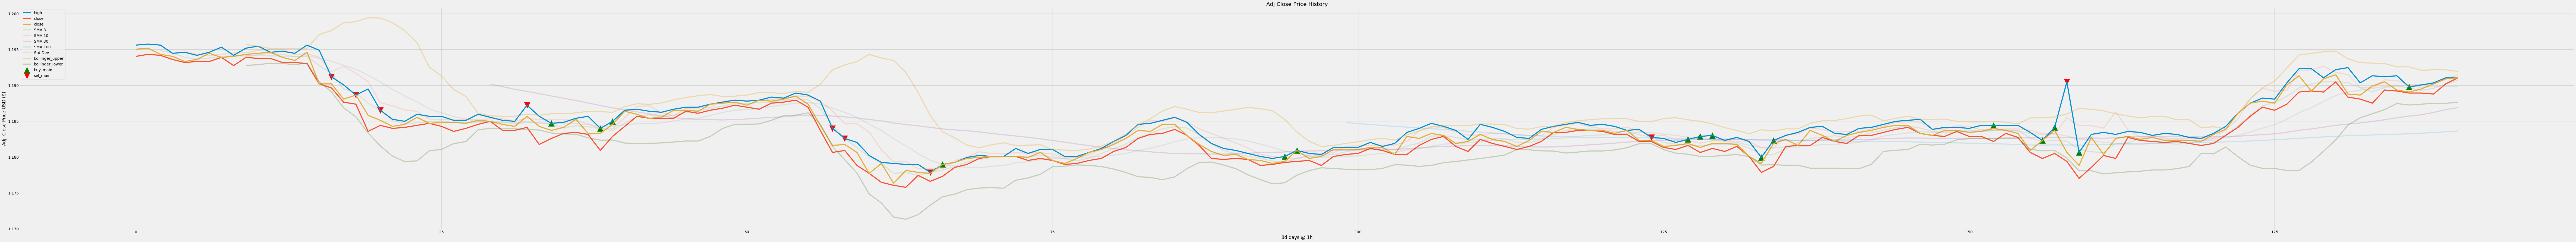

In [434]:
# visualize the data and strategy to buy or sell

plt.figure(figsize=(150, 14))

plt.plot(fdata['high'], label='high', alpha=2)
plt.plot(fdata['low'], label='close', alpha=2)
plt.plot(fdata['close'], label='close', alpha=2)

plt.plot(fdata['sma3'], label='SMA 3', alpha=0.15)
plt.plot(fdata['sma10'], label='SMA 10', alpha=0.15)
plt.plot(fdata['sma30'], label='SMA 30', alpha=0.15)
plt.plot(fdata['sma100'], label='SMA 100', alpha=0.15)

plt.plot(fdata['stddiv'], label='Std Dev', alpha=0.15)

plt.scatter(fdata.index, fdata['buy_main'], label='buy_main', marker='^', color='green', s=500)
plt.scatter(fdata.index, fdata['sel_main'], label='sel_main', marker='v', color='red', s=500)

# plt.scatter(fdata.index, fdata['buy_sell_001_buy'], label='buy_001', marker='^', color='green', s=200)
# plt.scatter(fdata.index, fdata['buy_sell_001_sel'], label='sel_001', marker='v', color='red', s=200)

# plt.scatter(fdata.index, fdata['buy_sell_002_buy'], label='buy_002', marker='^', color='green', s=200)
# plt.scatter(fdata.index, fdata['buy_sell_002_sel'], label='sel_002', marker='v', color='red', s=200)

# plt.scatter(fdata.index, fdata['sell_001_buy'], label='sell_001_buy', marker='^', color='green', s=200, alpha=1)
# plt.scatter(fdata.index, fdata['sell_001_sel'], label='sell_001_sel', marker='v', color='red', s=200, alpha=1)

# plt.scatter(fdata.index, fdata['buy_001_buy'], label='buy_001_buy', marker='^', color='green', s=200, alpha=1)
# plt.scatter(fdata.index, fdata['buy_001_sel'], label='buy_001_sel', marker='v', color='red', s=200, alpha=1)

plt.plot(fdata['bollinger_upper'], label='bollinger_upper', alpha=0.35)
plt.plot(fdata['bollinger_lower'], label='bollinger_lower', alpha=0.35)

plt.title('Adj Close Price History')
plt.xlabel(f'{dayRange} days @ {Interval}')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.savefig("/var/www/html/websites/ormoos.email/ml/updated.jpg")
